# Ternary Search Tree Demo

This notebook demonstrates basic insert/search operations and illustrates best/average/worst case behavior.

In [2]:
import sys, os
# notebooks/ is the current working dir; project root is one level up
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))


In [3]:
from src.ternary_search_tree import TernarySearchTree

# Load a small sample of words
words = open('../data/corncob_lowercase.txt').read().split()[:1000]

# Build the tree
tree = TernarySearchTree()
for w in words:
    tree.insert(w)

# Quick sanity checks
print(tree.search(words[0]))       # Expected: True
print(tree.search('thisisnotaword'))  # Expected: False

True
False


In [4]:
import time
from src.ternary_search_tree import TernarySearchTree

def bench(n):
    words = open('../data/corncob_lowercase.txt').read().split()[:n]
    tree = TernarySearchTree()
    t0 = time.time()
    for w in words:
        tree.insert(w)
    t1 = time.time()
    for w in words:
        _ = tree.search(w)
    t2 = time.time()
    return t1-t0, t2-t1

# Run for a few sizes
for size in [1000, 5000, 10000]:
    ins, srch = bench(size)
    print(f"{size:6d} words → insert: {ins:.3f}s, search: {srch:.3f}s")


  1000 words → insert: 0.005s, search: 0.004s
  5000 words → insert: 0.038s, search: 0.020s
 10000 words → insert: 0.045s, search: 0.037s


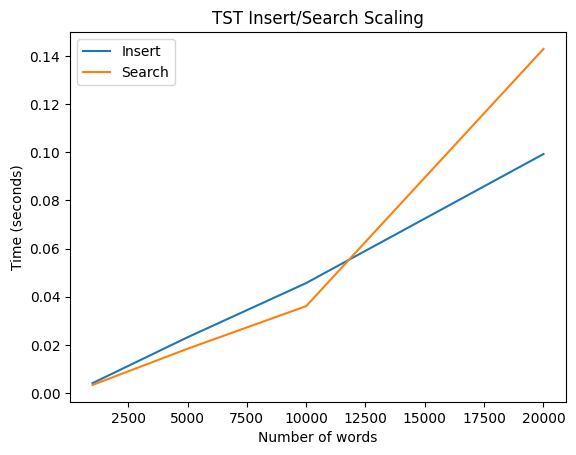

In [6]:
import matplotlib.pyplot as plt
from src.ternary_search_tree import TernarySearchTree
import time

def bench(n):
    words = open('../data/corncob_lowercase.txt').read().split()[:n]
    tree = TernarySearchTree()
    t0 = time.time()
    for w in words: tree.insert(w)
    t1 = time.time()
    for w in words: _ = tree.search(w)
    t2 = time.time()
    return t1-t0, t2-t1

sizes = [1000, 5000, 10000, 20000]
insert_times, search_times = zip(*(bench(n) for n in sizes))

plt.plot(sizes, insert_times, label='Insert')
plt.plot(sizes, search_times, label='Search')
plt.xlabel('Number of words')
plt.ylabel('Time (seconds)')
plt.title('TST Insert/Search Scaling')
plt.legend()
plt.show()

## Complexity Scenarios

**Best case**  
Words: `['ace', 'bdf', 'egi']`  
Balanced branching yields height ≈ word length, so O(L) per operation.
```
    c
   /|\
  a d g
   \ \ \
    e f i
```

**Average case**  
Random prefixes lead to a roughly balanced TST, still O(L).

**Worst case**  
Words: `['aaa', 'bbb', 'ccc']`  
Skewed to a linear chain, height ≈ N·L, so O(N·L):
```
a — a — a
\
 b — b — b
  \
   c — c — c
```